<a href="https://colab.research.google.com/github/Ricardodiazguerra/Tareas_Multimedia/blob/main/Actividad_4/Actividad_4_D%C3%ADazRicardo_19618663-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: _______</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

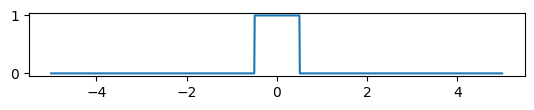

In [ ]:
def pulso(t):
    return np.where(np.abs(t) < 0.5, 1, 0)
dt = 0.01
t = np.arange(-5,5,dt)
señal_pulso = pulso(t)
plt.subplot(5,1,1)
plt.plot(t,señal_pulso)
plt.show()

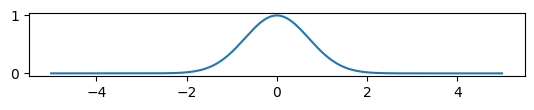

In [ ]:
def impulso_filtrado(t):
  return np.exp(-t**2)
dt = 0.01
t = np.arange(-5, 5, dt)
plt.subplot(5, 1, 1)
señal_filtrada = impulso_filtrado(t)
plt.plot(t,señal_filtrada)
plt.show()

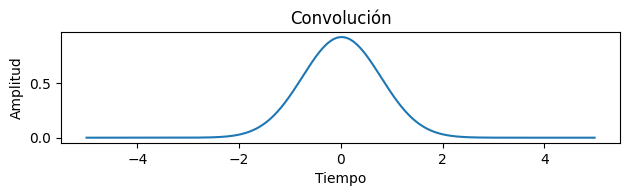

In [ ]:
def convolucion(s1, s2, dt):
    r = np.convolve(s1, s2, mode='same') * dt
    return r
dt = 0.01
t = np.arange(-5, 5, dt)
pulso_signal = pulso(t)
impulso_filtrado_signal = impulso_filtrado(t)
convolved_signal = convolucion(pulso_signal, impulso_filtrado_signal, dt)
plt.subplot(3, 1, 3)
plt.plot(t, convolved_signal)
plt.show()



## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


In [1]:
import numpy as np
import matplotlib.pyplot as plt

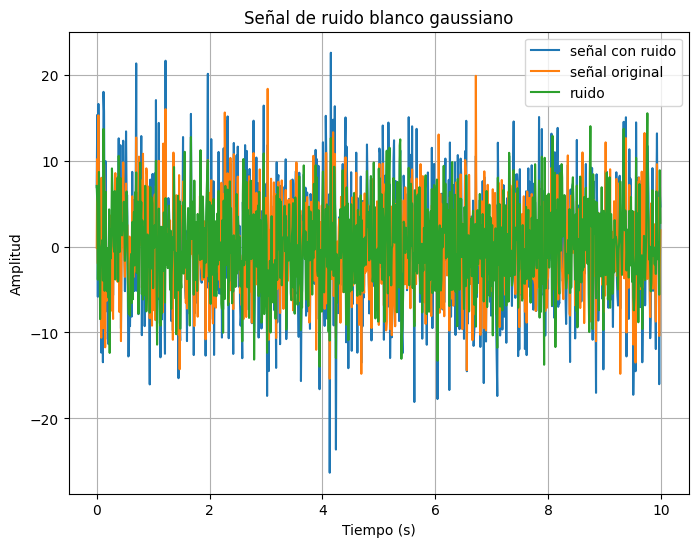

In [46]:
duracion = 10.0
frecuencia_de_muestreo = 100
numero_de_puntos = int(duracion * frecuencia_de_muestreo)

ruido = np.random.normal(0, 5, numero_de_puntos)

t = np.linspace(0, duracion, numero_de_puntos, endpoint=False)

ruido1 = np.random.normal(0, 5, numero_de_puntos)

señal_con_ruido = ruido + ruido1

plt.figure(figsize=(8, 6))

plt.plot(t, señal_con_ruido, label = "señal con ruido")
plt.plot(t, ruido, label = "señal original")
plt.plot(t, ruido1, label = "ruido")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal de ruido blanco gaussiano')
plt.legend()
plt.grid(True)
plt.show()

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$\psi(t) = \frac{2}{\sqrt{3} \sqrt[4]{\pi}} \exp^{-\frac{t^2}{2}}
          \left( 1 - t^2 \right)$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):

    # your code
    return 0


###  Explica el siguiente fragmento de código en detalle

In [ ]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

### Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.


### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/